In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('IRIS.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
x = df.iloc[:, [0, 1, 2, 3]].values

In [6]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df[0:10]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [9]:
df_count = pd.crosstab(index=df["species"], columns="count")
df_count

col_0,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [11]:
df_setosa = df.loc[df["species"] == "Iris-setosa"]
df_versicolor = df.loc[df["species"] == "Iris-versicolor"]
df_virginica = df.loc[df["species"] == "Iris-virginica"]

In [14]:
df_setosa.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


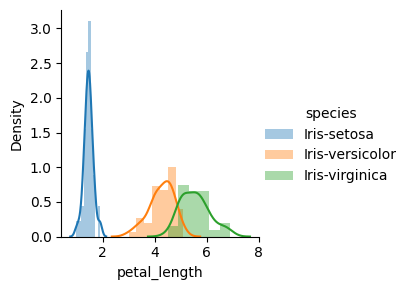

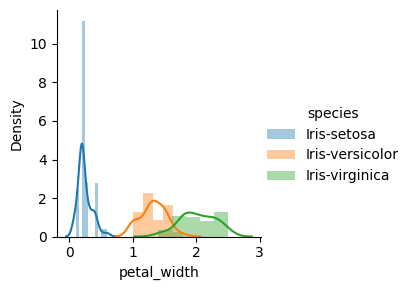

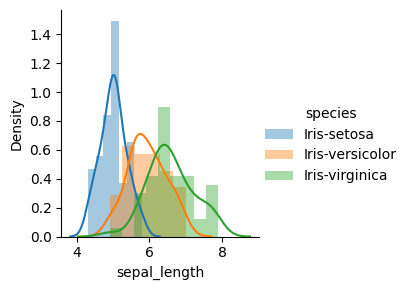

In [22]:
sns.FacetGrid(df,hue="species",height=3).map(sns.distplot,"petal_length").add_legend()
sns.FacetGrid(df,hue="species",height=3).map(sns.distplot,"petal_width").add_legend()
sns.FacetGrid(df,hue="species",height=3).map(sns.distplot,"sepal_length").add_legend()
plt.show()

<Axes: xlabel='species', ylabel='petal_length'>

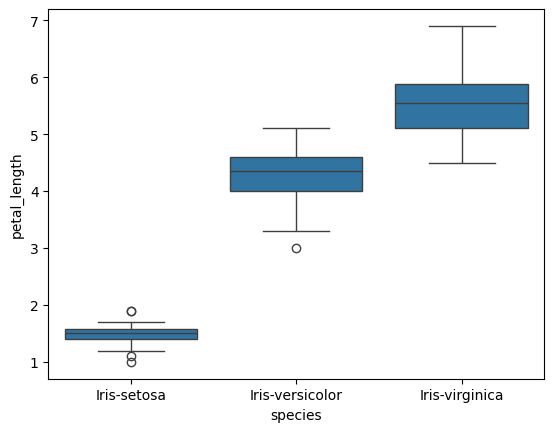

In [23]:
sns.boxplot(x="species",y="petal_length",data=df)

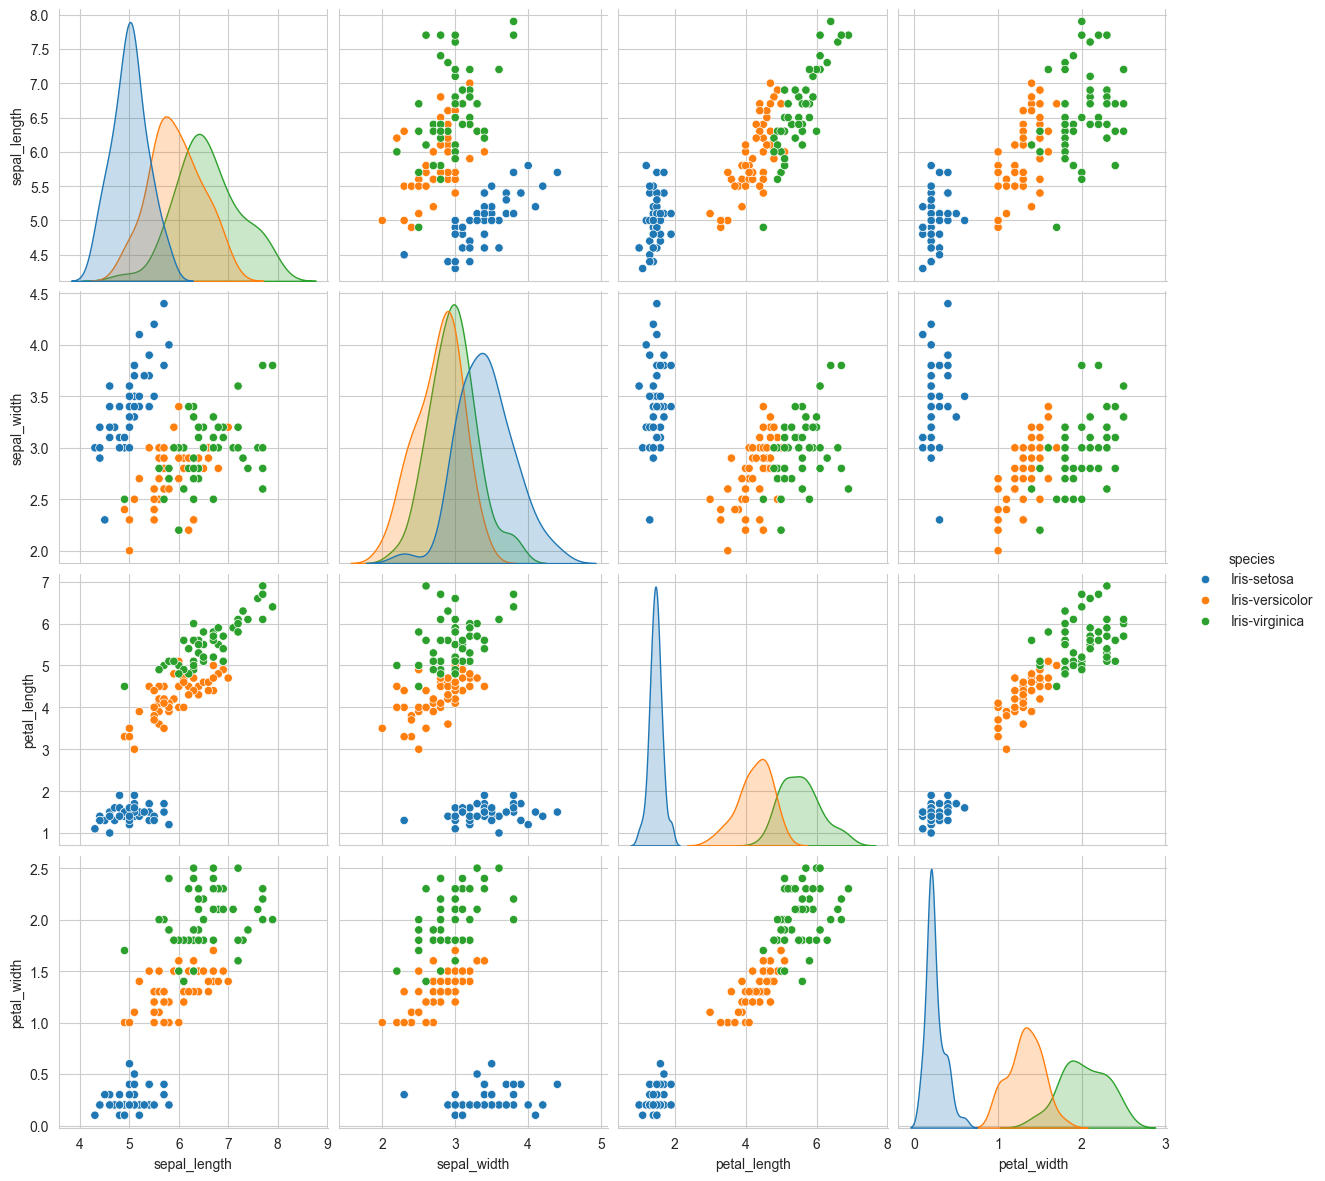

In [24]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="species",height=3)
plt.show()

## Machine Learning

**K- Means Algorithm**

In [25]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

### Using the elbow method to determine the optimal number of clusters for k-means clustering

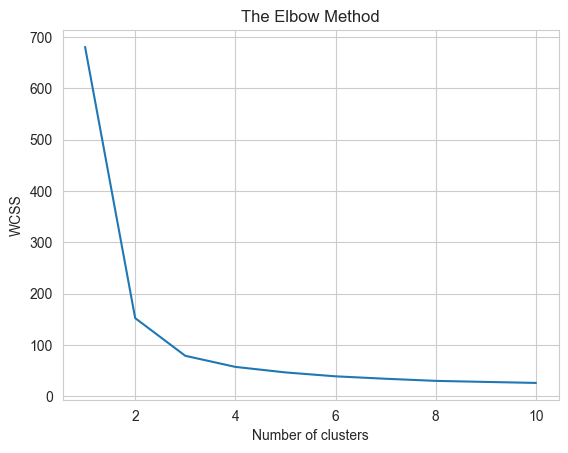

In [27]:
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [29]:
kmeans = KMeans(n_clusters=3,init="k-means++",max_iter=300,n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(x)

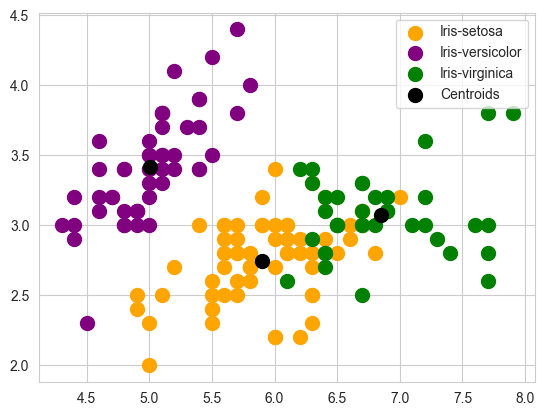

In [40]:
#Visualising the clusters
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c="orange",label="Iris-setosa")
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c="purple",label="Iris-versicolor")
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c="green",label="Iris-virginica")

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')

plt.legend()

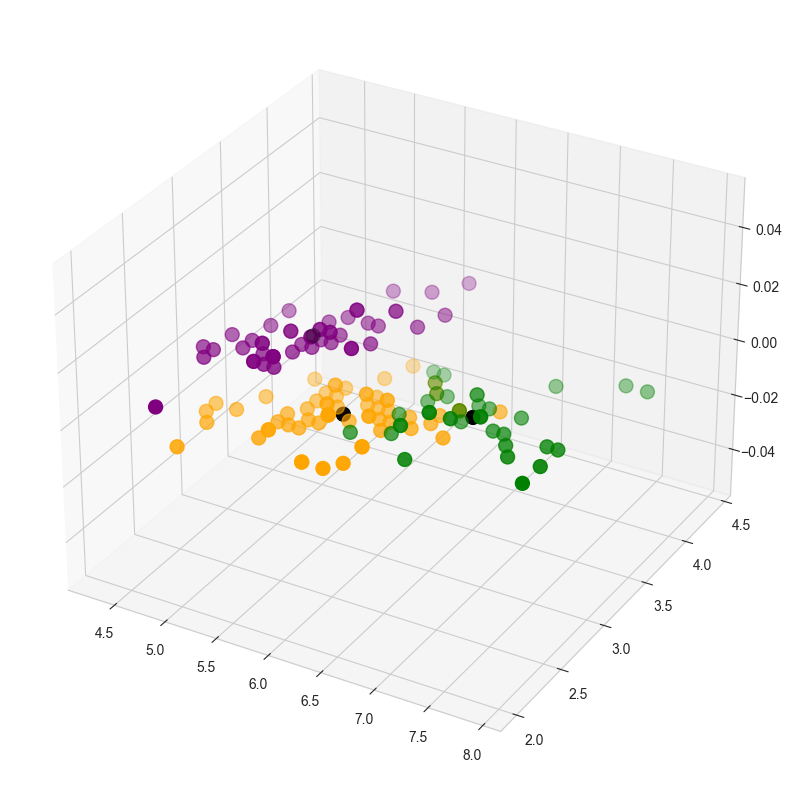

In [42]:
##  3d Plotting
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c="orange",label="Iris-setosa")
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c="purple",label="Iris-versicolor")
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c="green",label="Iris-virginica")

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.show()
